In [12]:
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import scipy.stats as stats

In [4]:
price_company={}
price_lst=[]
stocks_lst=['AAPL','MSFT','FB','TWTR','AAL','AMZN','IBM','HSBC','GILD','TSLA']
start = dt.datetime(2019, 3, 24)
end = dt.datetime(2020, 3, 24)


for i in stocks_lst:
    price_company[i] = web.DataReader(i ,"yahoo", start, end)['Adj Close']

    
df_comp_price = pd.DataFrame(price_company)
df_comp_price_pct=pd.DataFrame.pct_change(df_comp_price)
display(df_comp_price)
display(df_comp_price_pct)

,AAPL,MSFT,FB,TWTR,AAL,AMZN,IBM,HSBC,GILD,TSLA
Date,,,,,,,,,,
2019-03-25,185.798523,115.801117,166.289993,32.590000,29.810328,1774.260010,131.209305,37.722549,60.907166,260.420013
2019-03-26,183.878922,116.047150,167.679993,33.060001,29.810328,1783.760010,132.189743,37.862507,61.336826,267.769989
2019-03-27,185.532745,114.925156,165.869995,32.279999,30.530672,1765.699951,131.265854,37.927818,60.783043,274.829987
2019-03-28,185.778839,115.082626,165.550003,32.869999,30.491201,1773.420044,131.906921,37.797188,60.811680,278.619995
2019-03-29,186.989685,116.076683,166.690002,32.880001,31.339823,1780.750000,133.019348,37.862507,62.072029,279.859985
...,...,...,...,...,...,...,...,...,...,...
2020-03-18,246.004074,140.010056,146.960007,22.000000,11.650000,1830.000000,102.179649,28.600000,78.719261,361.220001
2020-03-19,244.119171,142.313660,153.130005,24.129999,10.290000,1880.930054,99.012123,29.080000,77.856941,427.640015
2020-03-20,228.621140,136.968536,149.729996,23.950001,10.380000,1846.089966,94.127632,28.809999,72.613617,427.529999


,AAPL,MSFT,FB,TWTR,AAL,AMZN,IBM,HSBC,GILD,TSLA
Date,,,,,,,,,,
2019-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-26,-0.010332,0.002125,0.008359,0.014422,0.000000,0.005354,0.007472,0.003710,0.007054,0.028224
2019-03-27,0.008994,-0.009668,-0.010794,-0.023594,0.024164,-0.010125,-0.006989,0.001725,-0.009029,0.026366
2019-03-28,0.001326,0.001370,-0.001929,0.018278,-0.001293,0.004372,0.004884,-0.003444,0.000471,0.013790
2019-03-29,0.006518,0.008638,0.006886,0.000304,0.027832,0.004133,0.008433,0.001728,0.020725,0.004450
...,...,...,...,...,...,...,...,...,...,...
2020-03-18,-0.024480,-0.042096,-0.016464,-0.101307,-0.252246,0.012258,-0.029067,-0.037037,0.065754,-0.160344
2020-03-19,-0.007662,0.016453,0.041984,0.096818,-0.116738,0.027831,-0.031000,0.016783,-0.010954,0.183877
2020-03-20,-0.063486,-0.037559,-0.022203,-0.007460,0.008746,-0.018523,-0.049332,-0.009285,-0.067346,-0.000257


In [5]:
ss_ar=[]
ss_lst=[]
ss_lst_new=[]
for i in stocks_lst:
    ss_ar.append(np.array(df_comp_price[i]))    
for i in ss_ar:
    for j in ss_ar:
            ss_lst.append(int(stats.spearmanr(i,j)[0]*100)/100)                  
for i in range(0,91,10):
    ss_lst_new.append(ss_lst[i:i+10])
ss_lst_new_ar=np.array(ss_lst_new)
price_ss=dict(zip(stocks_lst,ss_lst_new))            
df_price_ss = pd.DataFrame(price_ss,index=stocks_lst)
display(df_price_ss)
print(ss_lst_new_ar)

,AAPL,MSFT,FB,TWTR,AAL,AMZN,IBM,HSBC,GILD,TSLA
AAPL,1.00,0.94,0.63,-0.38,-0.49,0.07,0.25,-0.56,0.39,0.84
MSFT,0.94,0.99,0.69,-0.36,-0.50,0.15,0.25,-0.58,0.47,0.75
FB,0.63,0.69,1.00,-0.19,0.07,0.44,0.43,0.00,0.33,0.49
TWTR,-0.38,-0.36,-0.19,1.00,0.05,0.09,0.29,0.09,-0.31,-0.60
AAL,-0.49,-0.50,0.07,0.05,1.00,0.37,0.20,0.87,-0.06,-0.26
AMZN,0.07,0.15,0.44,0.09,0.37,1.00,0.33,0.30,0.43,0.20
IBM,0.25,0.25,0.43,0.29,0.20,0.33,1.00,0.07,0.09,0.23
HSBC,-0.56,-0.58,0.00,0.09,0.87,0.30,0.07,1.00,-0.14,-0.37
GILD,0.39,0.47,0.33,-0.31,-0.06,0.43,0.09,-0.14,1.00,0.46
TSLA,0.84,0.75,0.49,-0.60,-0.26,0.20,0.23,-0.37,0.46,1.00


[[ 1.    0.94  0.63 -0.38 -0.49  0.07  0.25 -0.56  0.39  0.84]
 [ 0.94  0.99  0.69 -0.36 -0.5   0.15  0.25 -0.58  0.47  0.75]
 [ 0.63  0.69  1.   -0.19  0.07  0.44  0.43  0.    0.33  0.49]
 [-0.38 -0.36 -0.19  1.    0.05  0.09  0.29  0.09 -0.31 -0.6 ]
 [-0.49 -0.5   0.07  0.05  1.    0.37  0.2   0.87 -0.06 -0.26]
 [ 0.07  0.15  0.44  0.09  0.37  1.    0.33  0.3   0.43  0.2 ]
 [ 0.25  0.25  0.43  0.29  0.2   0.33  1.    0.07  0.09  0.23]
 [-0.56 -0.58  0.    0.09  0.87  0.3   0.07  1.   -0.14 -0.37]
 [ 0.39  0.47  0.33 -0.31 -0.06  0.43  0.09 -0.14  1.    0.46]
 [ 0.84  0.75  0.49 -0.6  -0.26  0.2   0.23 -0.37  0.46  1.  ]]


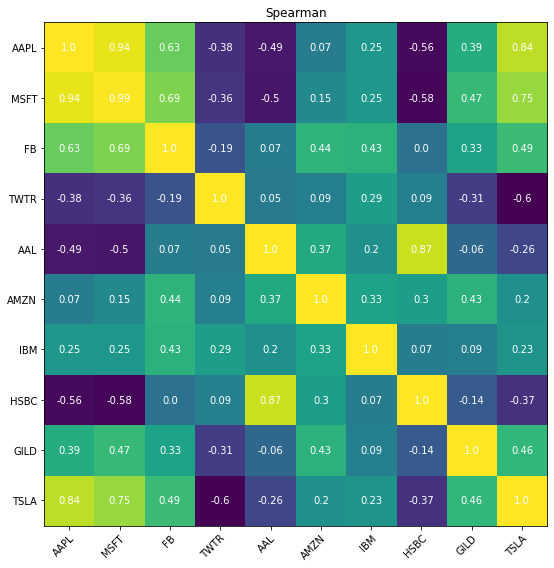

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ss_lst_new_ar)


ax.set_xticks(np.arange(len(stocks_lst)))
ax.set_yticks(np.arange(len(stocks_lst)))

ax.set_xticklabels(stocks_lst)
ax.set_yticklabels(stocks_lst)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(stocks_lst)):
    for j in range(len(stocks_lst)):
        text = ax.text(j, i, ss_lst_new_ar[i, j],ha="center", va="center", color="w")

ax.set_title("Spearman")
fig.tight_layout()
plt.show()

In [10]:
beta_ar=[]
beta_lst=[]
beta_lst_new=[]
for i in stocks_lst:
    beta_ar.append(np.array(df_comp_price_pct[i][1:235]))
for i in beta_ar:
    for j in beta_ar:
        beta_lst.append(int(((np.cov(i,j)/np.var(i))[0][1])*100)/100)                  
for i in range(0,91,10):
    beta_lst_new.append(beta_lst[i:i+10])
beta_lst_new_ar=np.array(beta_lst_new)
price_beta=dict(zip(stocks_lst,beta_lst_new))            
df_price_beta = pd.DataFrame(price_beta,index=stocks_lst)
display(df_price_beta)
print(beta_lst_new_ar)

,AAPL,MSFT,FB,TWTR,AAL,AMZN,IBM,HSBC,GILD,TSLA
AAPL,1.00,0.75,0.53,0.23,0.36,0.58,0.52,0.79,0.30,0.14
MSFT,0.52,1.00,0.51,0.19,0.28,0.65,0.49,0.52,0.30,0.14
FB,0.55,0.77,1.00,0.24,0.23,0.65,0.37,0.50,0.26,0.11
TWTR,0.67,0.80,0.66,1.00,0.20,0.68,0.56,0.58,0.44,0.05
AAL,0.81,0.92,0.50,0.15,1.00,0.78,0.80,1.13,0.33,0.27
AMZN,0.43,0.69,0.46,0.17,0.25,1.00,0.53,0.52,0.20,0.12
IBM,0.37,0.50,0.25,0.13,0.25,0.51,1.00,0.50,0.26,0.08
HSBC,0.35,0.33,0.21,0.09,0.22,0.32,0.32,1.00,0.23,0.04
GILD,0.25,0.35,0.20,0.12,0.12,0.22,0.31,0.43,1.00,0.07
TSLA,0.79,1.19,0.59,0.11,0.67,0.97,0.67,0.61,0.50,1.00


[[1.   0.52 0.55 0.67 0.81 0.43 0.37 0.35 0.25 0.79]
 [0.75 1.   0.77 0.8  0.92 0.69 0.5  0.33 0.35 1.19]
 [0.53 0.51 1.   0.66 0.5  0.46 0.25 0.21 0.2  0.59]
 [0.23 0.19 0.24 1.   0.15 0.17 0.13 0.09 0.12 0.11]
 [0.36 0.28 0.23 0.2  1.   0.25 0.25 0.22 0.12 0.67]
 [0.58 0.65 0.65 0.68 0.78 1.   0.51 0.32 0.22 0.97]
 [0.52 0.49 0.37 0.56 0.8  0.53 1.   0.32 0.31 0.67]
 [0.79 0.52 0.5  0.58 1.13 0.52 0.5  1.   0.43 0.61]
 [0.3  0.3  0.26 0.44 0.33 0.2  0.26 0.23 1.   0.5 ]
 [0.14 0.14 0.11 0.05 0.27 0.12 0.08 0.04 0.07 1.  ]]


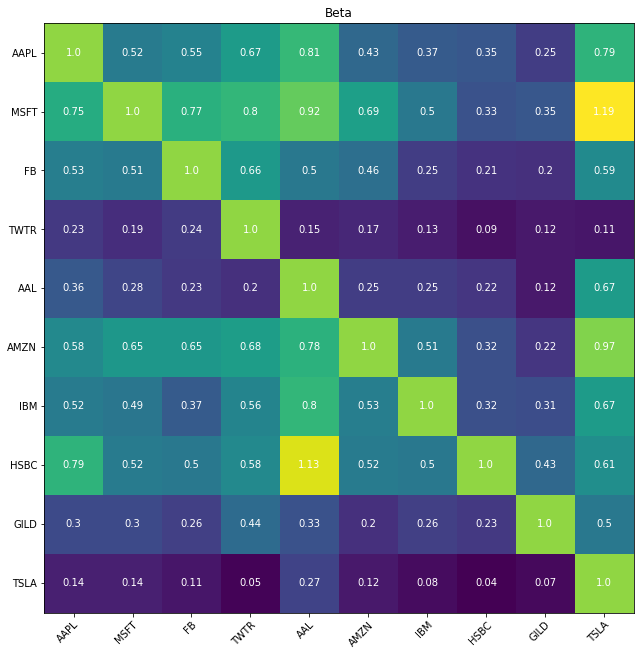

In [11]:
fig, ax = plt.subplots(figsize=(9,11))
im = ax.imshow(beta_lst_new_ar)


ax.set_xticks(np.arange(len(stocks_lst)))
ax.set_yticks(np.arange(len(stocks_lst)))

ax.set_xticklabels(stocks_lst)
ax.set_yticklabels(stocks_lst)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(stocks_lst)):
    for j in range(len(stocks_lst)):
        text = ax.text(j, i, beta_lst_new_ar[i, j],ha="center", va="center", color="w")

ax.set_title("Beta")
fig.tight_layout()
plt.show()